# A Few Model Run Examples and Output Notebook

Let's start with two basic model runs, one using ABIFM and the other using the singular approach (by default, the DeMott et al. (2010) size-dependent parametrization), each with a single monomodal INP population (diameter of 1 $\mu m$; $N_{INP}\ =\ 1\ L^{-1}$). Throughout the simulation, we use a single profile from the LES output (3 $h$; after the simulation reached a steady-state).

In [1]:
from init_model import ci_model
import numpy as np

# ABIFM
model_abifm = ci_model(use_ABIFM=True,
                 entrain_from_cth=False,
                 aer_info=[{"name": "Al2O3_1",                # INP population #1 properties
                            "n_init_max": 2.,
                            "psd": {"type": "mono",
                                   "diam": 1.},                            
                            "nucleus_type": "Al2O3"}],
                 t_harvest=3600*3)                               # True - run model after initialization

# Singular
model_singular = ci_model(use_ABIFM=False,
                 entrain_from_cth=False,
                 aer_info=[{"name": "Al2O3_1",                # INP population #1 properties
                            "n_init_max": 2.,
                            "psd": {"type": "mono",
                                   "diam": 1.},                            
                            "nucleus_type": "Al2O3"}],
                 t_harvest=3600*3)                               # True - run model after initialization

Model initalization done! Total processing time = 0.497022 s
10% of model run completed. Elapsed time: 0.48 s.
20% of model run completed. Elapsed time: 0.96 s.
30% of model run completed. Elapsed time: 1.44 s.
40% of model run completed. Elapsed time: 1.92 s.
50% of model run completed. Elapsed time: 2.40 s.
60% of model run completed. Elapsed time: 2.88 s.
70% of model run completed. Elapsed time: 3.36 s.
80% of model run completed. Elapsed time: 3.84 s.
90% of model run completed. Elapsed time: 4.32 s.

Model run finished! Total run time = 4.808468 s
Model run time stats:
Process: activation_aer: 0.69 s (14.42% of of total time)
Process: entrainment_aer: 0.40 s (8.32% of of total time)
Process: mixing_aer: 0.60 s (12.46% of of total time)
Process: sedimentation_ice: 0.44 s (9.18% of of total time)
Process: mixing_ice: 0.47 s (9.77% of of total time)
Process: data_allocation: 2.20 s (45.78% of of total time)


Model initalization done! Total processing time = 0.490563 s
10% of model 

Now, we can use the internal _ci_model_ object (or xarray) to generate some plots, in the example below nucleated ice time-height curtains and profile mean time series.

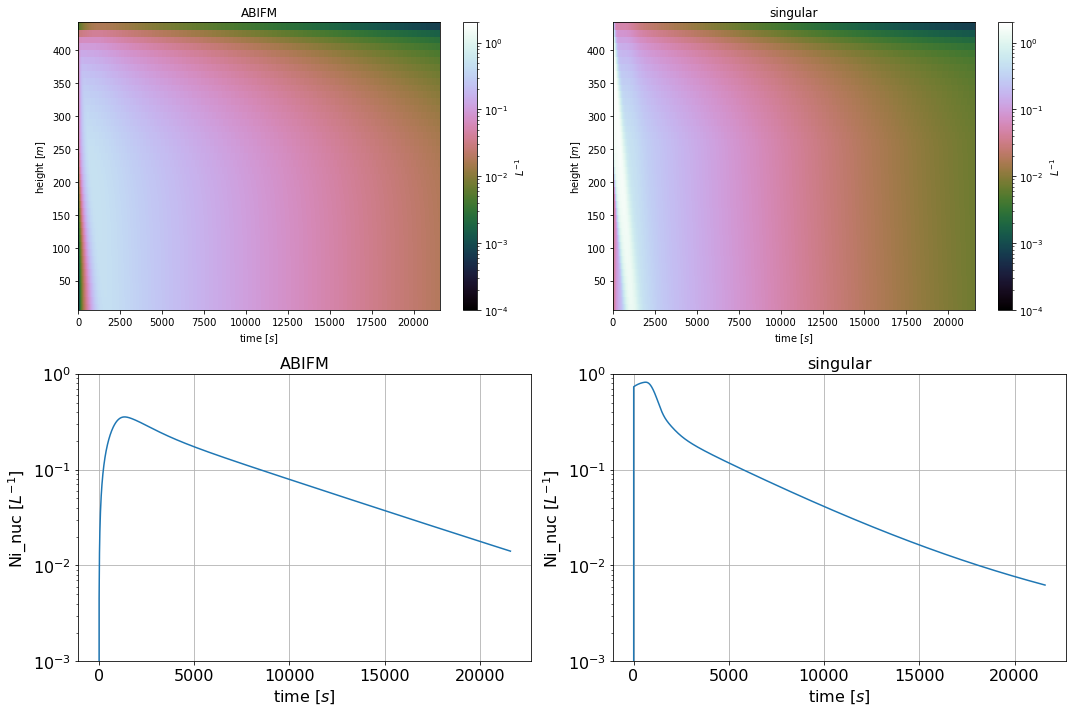

In [2]:
cb = {}
xticks = np.linspace(0, 2, 2)
fig, ax = model_abifm.plot.generate_figure(subplot_shape=(2,2))
ax[0,0], cb["sub0"] = model_abifm.plot.curtain(model_abifm, ax=ax[0,0], field_to_plot="Ni_nuc", vmin=1e-4, vmax=2e0, log_plot=True, title="ABIFM")
ax[0,1], cb["sub1"] = model_abifm.plot.curtain(model_singular, ax=ax[0,1], field_to_plot="Ni_nuc", vmin=1e-4, vmax=2e0, log_plot=True, title="singular")
ax[1,0] = model_abifm.plot.tseries(model_abifm, ax=ax[1,0], field_to_plot="Ni_nuc", grid=True, yscale="log", ylim=[1e-3, 1], title="ABIFM")
ax[1,1] = model_abifm.plot.tseries(model_singular, ax=ax[1,1], field_to_plot="Ni_nuc", grid=True, yscale="log", ylim=[1e-3, 1], title="singular")

Let's see the output fields in our model i/o xr.Dataset:

In [3]:
model_abifm.ds

<xarray.Dataset>
Dimensions:      (height: 43, time: 2161)
Coordinates:
  * height       (height) float32 5.208 15.62 26.04 36.46 ... 421.9 432.3 442.7
  * time         (time) int64 0 10 20 30 40 50 ... 21560 21570 21580 21590 21600
Data variables: (12/17)
    delta_z      (height) float32 10.42 10.42 10.42 10.42 ... 10.42 10.42 10.42
    RH           (height, time) float64 0.8398 0.8398 0.8398 ... 0.8329 0.8329
    ql           (height, time) float64 3.337e-07 3.337e-07 ... 0.001123
    T            (height, time) float64 256.8 256.8 256.8 ... 255.3 255.3 255.3
    Ni           (height, time) float64 0.02164 0.02164 ... 0.0006757 0.0006757
    prec         (height, time) float64 0.0001015 0.0001015 ... 2.327e-08
    ...           ...
    v_f_ice      (time) float64 0.3 0.3 0.3 0.3 0.3 0.3 ... 0.3 0.3 0.3 0.3 0.3
    delta_aw     (height, time) float64 -0.01277 -0.01277 ... -0.007703
    S_ice        (height, time) float64 0.985 0.985 0.985 ... 0.9908 0.9908
    Ni_nuc       (height, time) float64 0.0 4.258e-05 ... 0.000273 0.0002726
    nuc_rate     (height, time) float64 0.0 1.636e-06 ... 1.26e-07 1.258e-07
    time_h       (time) float64 0.0 0.002778 0.005556 ... 5.994 5.997 6.0

To examine the INP dataset we need to specify the population name (that way, we can call an xr.Dataset of each INP populationin, in the case of multiple INP populations). Let's examine the difference in INP xr.Dataset fields for ABIFM and singular. Note that particle diameter currently has no impact on the singular approach (moreoever, in that case, nucleus type specification is not required).

In [4]:
model_abifm.aer["Al2O3_1"].ds

<xarray.Dataset>
Dimensions:    (diam: 1, height: 43, time: 2161)
Coordinates:
  * diam       (diam) float64 1.0
  * height     (height) float32 5.208 15.62 26.04 36.46 ... 421.9 432.3 442.7
  * time       (time) int64 0 10 20 30 40 50 ... 21560 21570 21580 21590 21600
Data variables:
    dn_dlogD   (diam) float64 2.0
    surf_area  (diam) float64 3.142e-08
    Jhet       (height, time) float64 26.04 26.04 26.04 26.04 ... 31.0 31.0 31.0
    n_aer      (height, time, diam) float64 2.0 2.0 2.0 ... 0.1293 0.1292 0.1291
    time_h     (time) float64 0.0 0.002778 0.005556 0.008333 ... 5.994 5.997 6.0

In [5]:
model_singular.aer["Al2O3_1"].ds

<xarray.Dataset>
Dimensions:    (T: 45, diam: 1, height: 43, time: 2161)
Coordinates:
  * T          (T) float64 253.0 253.1 253.3 253.4 ... 265.8 266.6 267.3 268.2
  * height     (height) float32 5.208 15.62 26.04 36.46 ... 421.9 432.3 442.7
  * time       (time) int64 0 10 20 30 40 50 ... 21560 21570 21580 21590 21600
  * diam       (diam) float64 1.0
Data variables:
    dn_dlogD   (diam) float64 2.0
    surf_area  (diam) float64 3.142e-08
    inp        (height, time, T) float64 0.03439 0.0356 ... 1.041e-06 1.533e-06
    time_h     (time) float64 0.0 0.002778 0.005556 0.008333 ... 5.994 5.997 6.0

When using ABIFM, we can see below how to print the ABIFM coefficient for a given INP population and where ABIFM coefficient table is stored:

In [6]:
print("m = %f, c = %f" % (model_abifm.aer["Al2O3_1"].Jhet.m, model_abifm.aer["Al2O3_1"].Jhet.c))
model_abifm.aer["Al2O3_1"].Jhet.Jhet_coeff_table

m = 14.966390, c = 1.606710


,c,sigma_c,LCL_c,UCL_c,m,sigma_m,LCL_m,UCL_m
nucleus_type,,,,,,,,
Ice nucleus,c,sigma_c,LCL_c,UCL_c,m,sigma_m,LCL_m,UCL_m
N. atomus,-17.12381,0.27733,-17.66751,-16.5801,83.95603,1.17979,81.64302,86.26904
T. pseudonana,-10.4345,0.17629,-10.78012,-10.08889,59.66992,0.79104,58.11905,61.22079
Pahokee Peat,-15.77884,0.18337,-16.13839,-15.41929,78.30951,0.79777,76.74529,79.87374
Leonardite,-13.40148,0.09931,-13.59621,-13.20675,66.90259,0.42911,66.06118,67.744
Illite,-10.66873,0.07544,-10.81666,-10.5208,54.48075,0.33316,53.8275,55.134
1-Nonadecanol,-2.92414,0.04322,-3.00894,-2.83934,28.13797,0.35129,27.44871,28.82723
Kaolinite,-10.54758,0.38782,-11.31377,-9.7814,54.58834,1.39323,51.8359,57.34078
Al2O3,1.60671,0.58271,0.34784,2.86558,14.96639,2.14742,10.32717,19.6056


As mentioned above, we can also use xarray to examine the model output. While we can still use the two model objects from above, let us run two additional simulations using the model's default PSD ($D_{mean}\ =\ 1\ \mu m$, SD = 2.5, 35 PSD bins, $D_{min}\ =\ 0.01\ \mu m$, and bin mass ratio of 2). Here, we use 6 h long model run. in the first simulation, the LES sounding we use represents the simulation mean between 3-6 h (after steady state), while in the second we inform the model with the full (un-averaged) LES output. Note that ABIFM, LES output temporal averaging, and the PSD parameters are all used by default, so these can be specified when calling the model, but are not required in this case. Note that in both simulations we specified the mixing layer as only occurring within cloud boundaries (see figures below).

In [8]:
from init_model import ci_model

# Average LES in time
model_def = ci_model(final_t=3600*6,                           # 1D model simulation time
                 mixing_bounds=("ql_cbh", "ql_cbh"),           # Mixing layer bounds (base, top) in m ("ql_cbh" for cloud base/top)
                 aer_info=[{"name": "Al2O3_default",           # INP population #4 properties
                            "n_init_max": 1.5,
                            "psd": {"type": "default"},                            
                            "nucleus_type": "Al2O3"}
                          ],
                 t_harvest=(3600*3, 3600*6),                   # time(s) to harvest from the LES model output 
                 run_model=False)

# Use full LES output to inform the model
model_def_no_les_ave =   ci_model(final_t=3600*6,                      # 1D model simulation time
                         mixing_bounds=("ql_cbh", "ql_cbh"),           # Mixing layer bounds (base, top) in m ("ql_cbh" for cloud base/top)
                         t_averaged_les=False,                         # True - time-averaged LES, False - LES evolution informs 1d model
                         aer_info=[{"name": "Al2O3_default",           # INP population #4 properties
                                    "n_init_max": 1.5,
                                    "psd": {"type": "default"},                            
                                    "nucleus_type": "Al2O3"}
                                  ],
                         t_harvest=(0, 3600*6),                        # time(s) to harvest from the LES model output 
                         run_model=False)

Model initalization done! Total processing time = 1.179468 s
Model initalization done! Total processing time = 2.632711 s


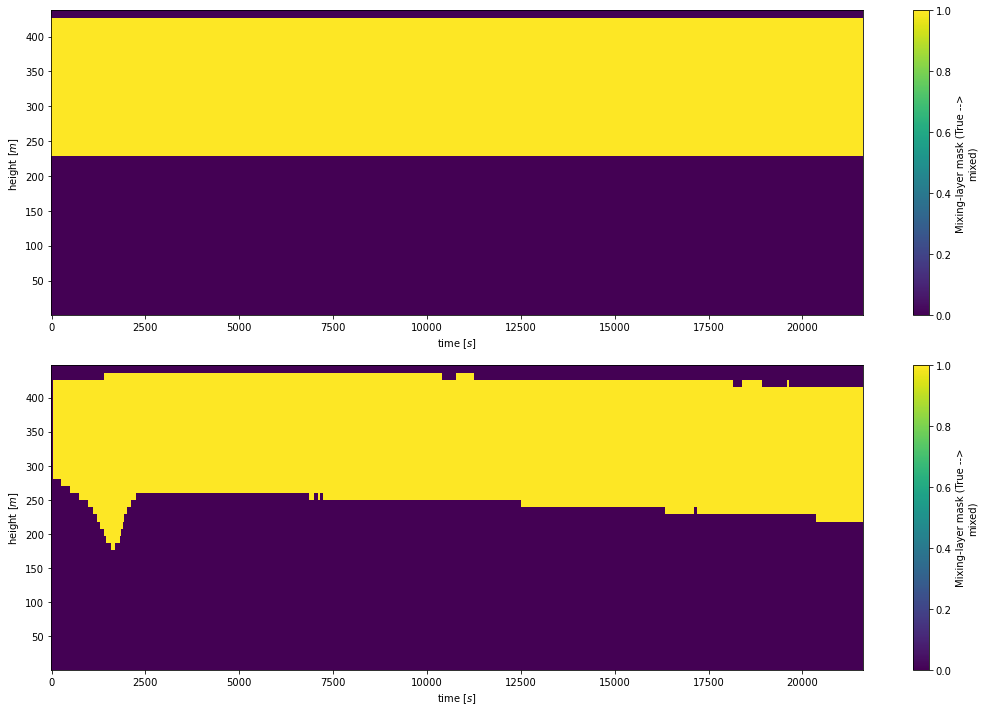

In [9]:
fig, ax = model_def_no_les_ave.plot.generate_figure(subplot_shape=(2,1))
model_def.ds["mixing_mask"].plot(ax=ax[0])
model_def_no_les_ave.ds["mixing_mask"].plot(ax=ax[1])
fig.tight_layout()

The simulation below shows all model input options and capabilities of handling multiple INP populations that can be weighted vertically (introducing INP layers). Note that if weights larger than 1 are specified, the weight profile is normalized to have a maximum value of 1 (a message is printed on the screen to let the user know).
In this simulation we use the full LES output, and specify 5 INP populations of different types (nucleus type, PSD, etc.). 
Here, our mixed layer goes from the surface up to cloud top (note that "ql_cbh" applies to cloud base or cloud top, depending on the 'mixing_bounds' element (first or second).

In [11]:
from init_model import ci_model
import numpy as np

model = ci_model(final_t=3600*2,                               # 1D model simulation time
                 delta_t=10,                                   # ∆t in s
                 use_ABIFM=True,                               # True - ABIFM, False - singular
                 t_averaged_les=False,                         # True - time-averaged LES, False - LES evolution informs 1d model
                 custom_vert_grid=np.arange(0., 500.+1., 10.), # None - use LES vertical grid, np.ndarray - custom vertical grid
                 w_e_ent=0.1e-3,                               # cloud-top entrainment value or time series
                 mixing_bounds=(0, "ql_cbh"),                  # Mixing layer bounds (base, top) in m ("ql_cbh" for cloud base/top)
                 entrain_from_cth=True,                        # True - from cloud top, False domain top (infinite source)
                 tau_mix=1800.,                                # Mixing time scale value or time series
                 v_f_ice=0.3,                                  # number-weighted fall velocity (value, t-series, or curtain)
                 in_cld_q_thresh=1e-3,                         # mixing ratio threshold for determining a cloud [g/kg]
                 aer_info=[{"name": "Illite_mono",             # INP population #1 properties
                            "n_init_max": 2.,
                            "psd": {"type": "mono",
                                   "diam": 1.},                            
                            "nucleus_type": "Illite",
                            "n_init_weight_prof":
                            {"height": np.array([0, 100, 150, 200, 500]),
                            "weight": np.array([0.8, 1., 1., 0.2, 0.1])}},
                           {"name": "Kaolinite",               # INP population #2 properties
                            "n_init_max": 1.5,
                            "psd": {"type": "logn",
                                    "diam_mean": 0.8,
                                    "geom_sd": 1.5,
                                    "n_bins": 40,
                                    "diam_min": 0.05,
                                    "m_ratio": 1.5},                            
                            "nucleus_type": "Kaolinite"},
                           {"name": "Al2O3_default",            # INP population #3 properties
                            "n_init_max": 1.5,
                            "psd": {"type": "default"},                            
                            "nucleus_type": "Al2O3",
                            "n_init_weight_prof":
                            {"height": np.array([0, 300, 350, 400, 500]),
                            "weight": np.array([0., 0.1, 1.0, 1.0, 0.1])}},
                           {"name": "DesertDust",               # INP population #4 properties
                            "n_init_max": [4329777, 640],
                            "psd": {"type": "multi_logn",
                                    "diam_mean": [0.0744, 2.251],                            
                                    "geom_sd": [1.76, 1.6],
                                    "n_bins": 50,
                                    "diam_min": (0.014, 20),
                                    "m_ratio": 1.5},                           
                            "nucleus_type": "Desert Dust"},
                           {"name": "Al2O3_custom",            # INP population #5 properties
                            "n_init_max": 1,
                            "psd": {"type": "custom",
                                    "diam": [0.1, 0.3, 1., 2., 10.],
                                    "dn_dlogD": [0.2, 0.1, 0.6, 0.1, 0.05],
                                    "norm_to_n_init_max": True},                            
                            "nucleus_type": "Al2O3"}
                            ],
                 les_out_path=None,                            # path of LES output sounding file to inform the model
                 les_out_filename=None,                        # filename of LES sounding file to inform the model
                 t_harvest=(0, 3600*6),                        # time(s) to harvest from the LES model output 
                 height_ind_2crop=600.,                        # height indices or vals for LES cropping ("ql_pbl": use ql thresh)
                 cbh_det_method="ql_cbh",                      # Method to detect cloud base (currently, only with a ql thresh)
                 do_entrain=True,                              # do entrainment in model run
                 do_mix_aer=True,                              # do aerosol mixing in model run
                 do_mix_ice=True,                              # do ice mixing in model run
                 do_sedim=True,                                # do sedimentation in model run
                 run_model=True)                               # True - run model after initialization

Some heights were omitted because they are outside the processed LES dataset grid
Model initalization done! Total processing time = 1.440409 s
10% of model run completed. Elapsed time: 0.58 s.
20% of model run completed. Elapsed time: 1.18 s.
30% of model run completed. Elapsed time: 1.79 s.
40% of model run completed. Elapsed time: 2.40 s.
50% of model run completed. Elapsed time: 3.01 s.
60% of model run completed. Elapsed time: 3.63 s.
70% of model run completed. Elapsed time: 4.23 s.
80% of model run completed. Elapsed time: 4.85 s.
90% of model run completed. Elapsed time: 5.46 s.

Model run finished! Total run time = 6.065369 s
Model run time stats:
Process: activation_aer: 1.26 s (20.85% of of total time)
Process: entrainment_aer: 0.55 s (9.14% of of total time)
Process: mixing_aer: 1.42 s (23.36% of of total time)
Process: sedimentation_ice: 0.15 s (2.46% of of total time)
Process: mixing_ice: 0.16 s (2.70% of of total time)
Process: data_allocation: 2.51 s (41.34% of of total 

Let's plot curtain plots of the model output for the INP population we named: "Al2O3_default". Here, we show the population's Jhet (depends on nucleus type and RH + T from the LES), temporal evoluation of the INP PSD at an altitude of 400 m (in-cloud), and the PSD profiles at initialization (t = 0 s) and 1 h into the simulation. Note the layer structure of the population at initialization as we used vertical weighting).

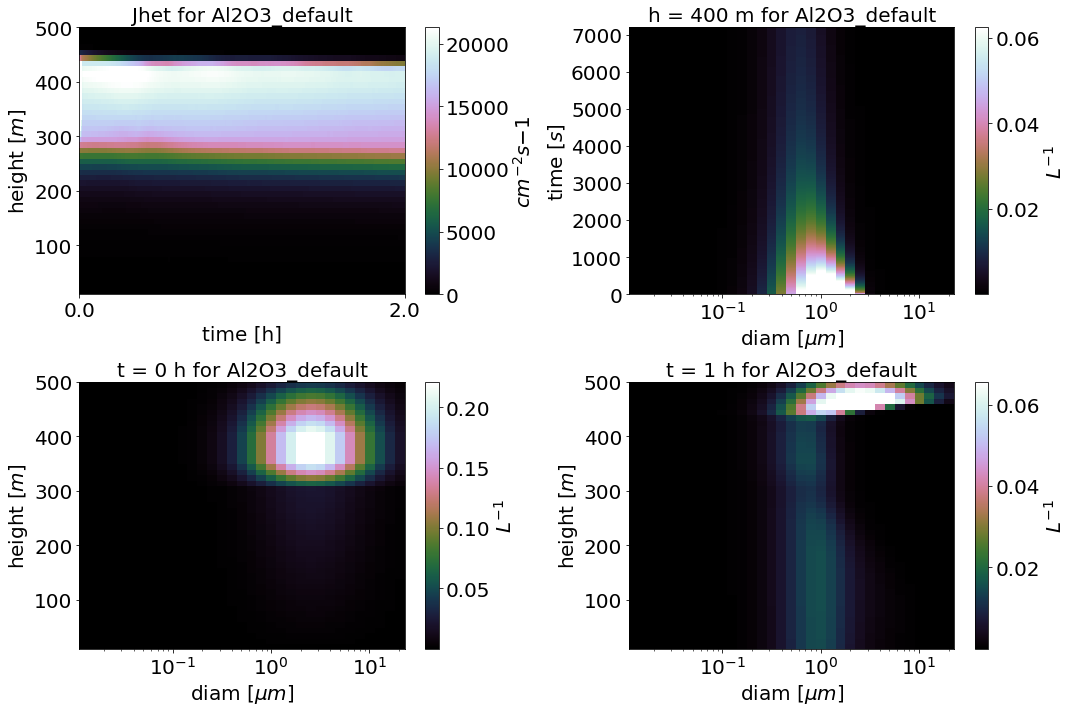

In [13]:
cb = {}
xticks = np.linspace(0, 2, 2)
fig, ax = model.plot.generate_figure(subplot_shape=(2,2))
ax[0,0], cb["sub0"] = model.plot.curtain(model, ax=ax[0,0], which_pop="Al2O3_default", field_to_plot="Jhet", font_size=20, vmin=0, xtick=xticks*3600, xticklabel=xticks, xlabel="time [h]", title="Jhet for Al2O3_default")
ax[0,1], cb["sub1"] = model.plot.curtain(model, ax=ax[0,1], which_pop="Al2O3_default", font_size=20, x="diam", y="time", aer_z=400., title="h = 400 m for Al2O3_default")
ax[1,0], cb["sub2"] = model.plot.curtain(model, ax=ax[1,0], which_pop="Al2O3_default", font_size=20, x="diam", aer_z=0., title="t = 0 h for Al2O3_default")
ax[1,1], cb["sub3"] = model.plot.curtain(model, ax=ax[1,1], which_pop="Al2O3_default", font_size=20, x="diam", aer_z=3600.,xscale="log", title="t = 1 h for Al2O3_default")

We can also produce time series of different variables at specific heights, for example.

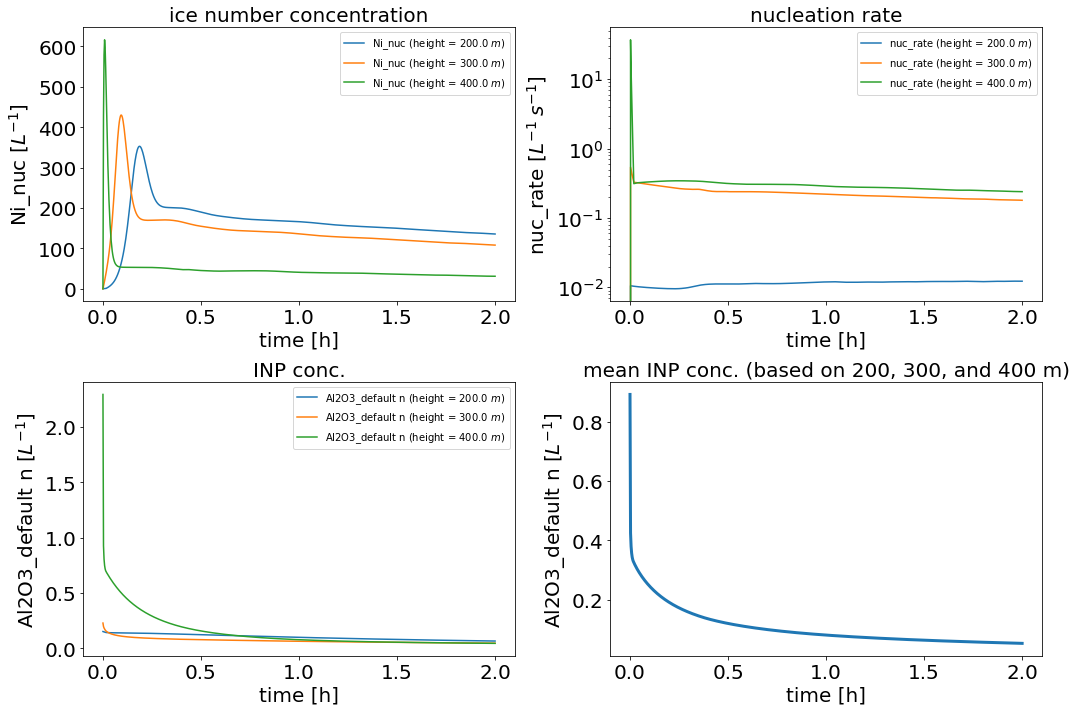

In [16]:
cb = {}
xticks = np.linspace(0, 2, 5)
Height=[200., 300., 400.]
fig, ax = model.plot.generate_figure(subplot_shape=(2,2))
ax[0,0] = model.plot.tseries(model, ax=ax[0,0], font_size=20, field_to_plot="Ni_nuc", Height=Height, xlabel="time [h]", xtick=xticks*3600, xticklabel=xticks, Height_dim_treat=None, title="ice number concentration")
ax[0,1] = model.plot.tseries(model, ax=ax[0,1], font_size=20, field_to_plot="nuc_rate", Height=Height, xlabel="time [h]", xtick=xticks*3600, xticklabel=xticks, yscale="log", Height_dim_treat=None, title="nucleation rate")
ax[1,0] = model.plot.tseries(model, ax=ax[1,0], which_pop="Al2O3_default", Height=Height, font_size=20, xlabel="time [h]", xtick=xticks*3600, xticklabel=xticks, Height_dim_treat=None, title="INP conc.")
ax[1,1] = model.plot.tseries(model, ax=ax[1,1], which_pop="Al2O3_default", Height=Height, font_size=20, xlabel="time [h]", xtick=xticks*3600, xticklabel=xticks, linewidth=3, title="mean INP conc. (based on 200, 300, and 400 m)")

Finally, we can also plot profiles at different times. In the example below to the right, a simulation average profile of total INP concentration for each of the INP populations is shown (note that dn_dlogD is summed over all diameters in each population).

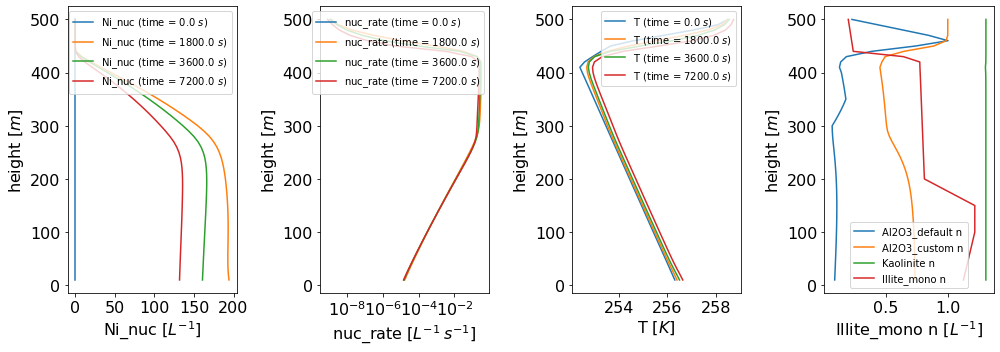

In [17]:
cb = {}
xticks = np.linspace(0, 2, 5)
fig, ax = model.plot.generate_figure(subplot_shape=(1,4), figsize=(14,5))
ax[0] = model.plot.profile(model, ax=ax[0], field_to_plot="Ni_nuc", Time=[0., 1800., 3600., 7200.], Time_dim_treat=None)
ax[1] = model.plot.profile(model, ax=ax[1], field_to_plot="nuc_rate", xscale="log", Time=[0., 1800., 3600., 7200.], Time_dim_treat=None)
ax[2] = model.plot.profile(model, ax=ax[2], field_to_plot="T", Time=[0., 1800., 3600., 7200.], Time_dim_treat=None)
ax[3] = model.plot.profile(model, ax=ax[3], which_pop="Al2O3_default")
ax[3] = model.plot.profile(model, ax=ax[3], which_pop="Al2O3_custom")
ax[3] = model.plot.profile(model, ax=ax[3], which_pop="Kaolinite")
ax[3] = model.plot.profile(model, ax=ax[3], which_pop="Illite_mono", legend=True)